# **Loading Data**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Other utilities
import warnings
warnings.filterwarnings('ignore')  # To suppress unnecessary warnings

pd.set_option('display.max_columns', None)
plt.style.use('ggplot')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ML Assignment/Datasets/airlines.csv')
df.head()

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,dissatisfied,Loyal Customer,28,Personal Travel,Business,3849,3,5,3,5,3,3,3,3,5,2,3,1,1,3,0,0.0
1,satisfied,Loyal Customer,15,Personal Travel,Eco,2060,3,3,3,3,4,4,5,4,5,3,5,3,4,4,0,0.0
2,dissatisfied,disloyal Customer,37,Business travel,Business,854,1,1,1,1,5,1,1,5,3,4,4,4,4,5,0,0.0
3,satisfied,Loyal Customer,58,Personal Travel,Eco,1146,5,5,5,5,3,4,5,4,4,4,4,3,4,3,88,71.0
4,satisfied,Loyal Customer,17,Business travel,Business,4909,3,3,3,3,4,4,4,4,2,5,2,3,2,4,0,0.0


# **Data Cleaning and EDA**

In [ ]:
df.shape

(50000, 22)

### **Handling the Nulls**

In [ ]:
df.isna().sum()

,0
satisfaction,0
Customer Type,0
Age,0
Type of Travel,0
Class,0
Flight Distance,0
Seat comfort,0
Departure/Arrival time convenient,0
Food and drink,0
Gate location,0


In [ ]:
df.dropna(inplace = True)
df.reset_index(drop = True)
df.shape

(49837, 22)

### **Handling the Duplicates**

In [ ]:
df.duplicated().sum()

0

### **Checking the Data Types**

In [ ]:
df.dtypes

,0
satisfaction,object
Customer Type,object
Age,int64
Type of Travel,object
Class,object
Flight Distance,int64
Seat comfort,int64
Departure/Arrival time convenient,int64
Food and drink,int64
Gate location,int64


### **Summary Stats**

In [ ]:
df.describe(include = np.number).transpose().astype(float).round(2)

,count,mean,std,min,25%,50%,75%,max
Age,49837.0,39.41,15.11,7.0,27.0,40.0,51.0,85.0
Flight Distance,49837.0,1983.66,1024.22,50.0,1364.0,1926.0,2546.0,6950.0
Seat comfort,49837.0,2.84,1.39,0.0,2.0,3.0,4.0,5.0
Departure/Arrival time convenient,49837.0,2.99,1.53,0.0,2.0,3.0,4.0,5.0
Food and drink,49837.0,2.85,1.44,0.0,2.0,3.0,4.0,5.0
Gate location,49837.0,2.98,1.31,0.0,2.0,3.0,4.0,5.0
Inflight wifi service,49837.0,3.25,1.32,0.0,2.0,3.0,4.0,5.0
Inflight entertainment,49837.0,3.38,1.35,0.0,2.0,4.0,4.0,5.0
Online support,49837.0,3.52,1.30,0.0,3.0,4.0,5.0,5.0
Ease of Online booking,49837.0,3.47,1.30,0.0,2.0,4.0,5.0,5.0


### **Checking the Data Distribution**

In [ ]:
print(df.columns)

Index(['satisfaction', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Seat comfort', 'Departure/Arrival time convenient',
       'Food and drink', 'Gate location', 'Inflight wifi service',
       'Inflight entertainment', 'Online support', 'Ease of Online booking',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes'],
      dtype='object')


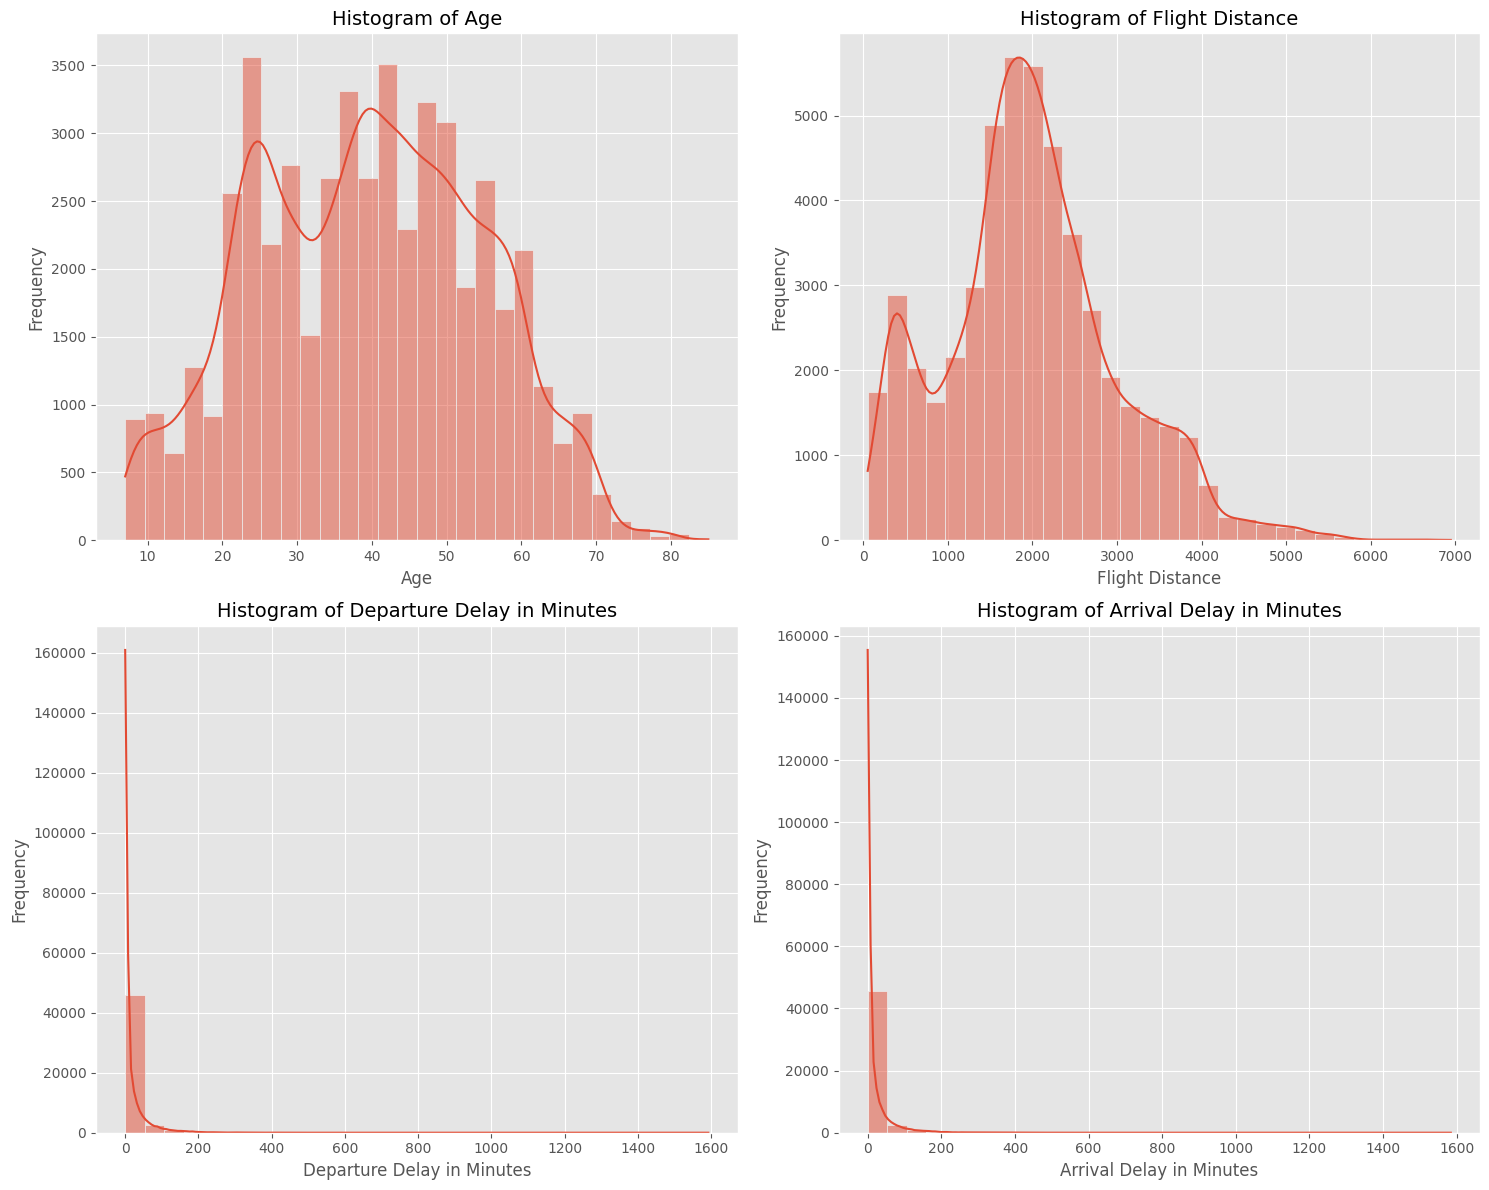

In [ ]:
cols_to_viz = ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']

fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.flatten()

for i, col in enumerate(cols_to_viz):
    sns.histplot(data=df, x=col, kde=True, ax=axes[i], bins=30)
    axes[i].set_title(f'Histogram of {col}', fontsize=14)
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel('Frequency', fontsize=12)

for j in range(len(cols_to_viz), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

### **Log Transformation**

**Distributions of Key Flight Attributes**

The image presents four histograms visualizing the distributions of age, flight distance, departure delay, and arrival delay. The age distribution is skewed right, with a peak around 30-35 years old. Flight distances are also skewed right, with a majority of flights covering shorter distances. Departure delays exhibit a long right tail, indicating a significant number of flights with substantial delays. Similarly, arrival delays show a right-skewed distribution, suggesting frequent delays in arrival times. The histograms provide valuable insights into the central tendencies and spread of these variables, revealing patterns that might be useful for further analysis or decision-making in the aviation context.


In [ ]:
skew_df = pd.DataFrame(cols_to_viz, columns = ['feature'])
skew_df

,feature
0,Age
1,Flight Distance
2,Departure Delay in Minutes
3,Arrival Delay in Minutes


In [ ]:
import scipy

skew_df['skew'] = skew_df['feature'].apply(lambda x: scipy.stats.skew(df[x]))
skew_df

,feature,skew
0,Age,0.004135
1,Flight Distance,0.464108
2,Departure Delay in Minutes,7.246524
3,Arrival Delay in Minutes,7.070624


In [ ]:
skew_df['skewed'] = skew_df['skew'].apply(lambda x: True if x >= 0.50 else False)
skew_df

,feature,skew,skewed
0,Age,0.004135,False
1,Flight Distance,0.464108,False
2,Departure Delay in Minutes,7.246524,True
3,Arrival Delay in Minutes,7.070624,True


In [ ]:
for column in skew_df.query("skewed == True")['feature'].values:
  df[column] = np.log1p(df[column])

df[cols_to_viz].head()

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
0,28,3849,0.000000,0.000000
1,15,2060,0.000000,0.000000
2,37,854,0.000000,0.000000
3,58,1146,4.488636,4.276666
4,17,4909,0.000000,0.000000


**Addressing Skewness in Numerical Features**

This code aims to address skewness in numerical features within a pandas DataFrame. Skewness is the asymmetry of a distribution, and many models assume normally distributed data. Skewed data can lead to biased or inaccurate results. This code identifies features with skewness greater than 0.50. For each skewed feature, a logarithmic transformation using `np.log1p` is applied. This transformation helps reduce right-skewness and can improve model performance by making them more robust to outliers. The code initializes a DataFrame to store feature names and calculates the skewness for each feature. It then identifies skewed features and applies the transformation to them.


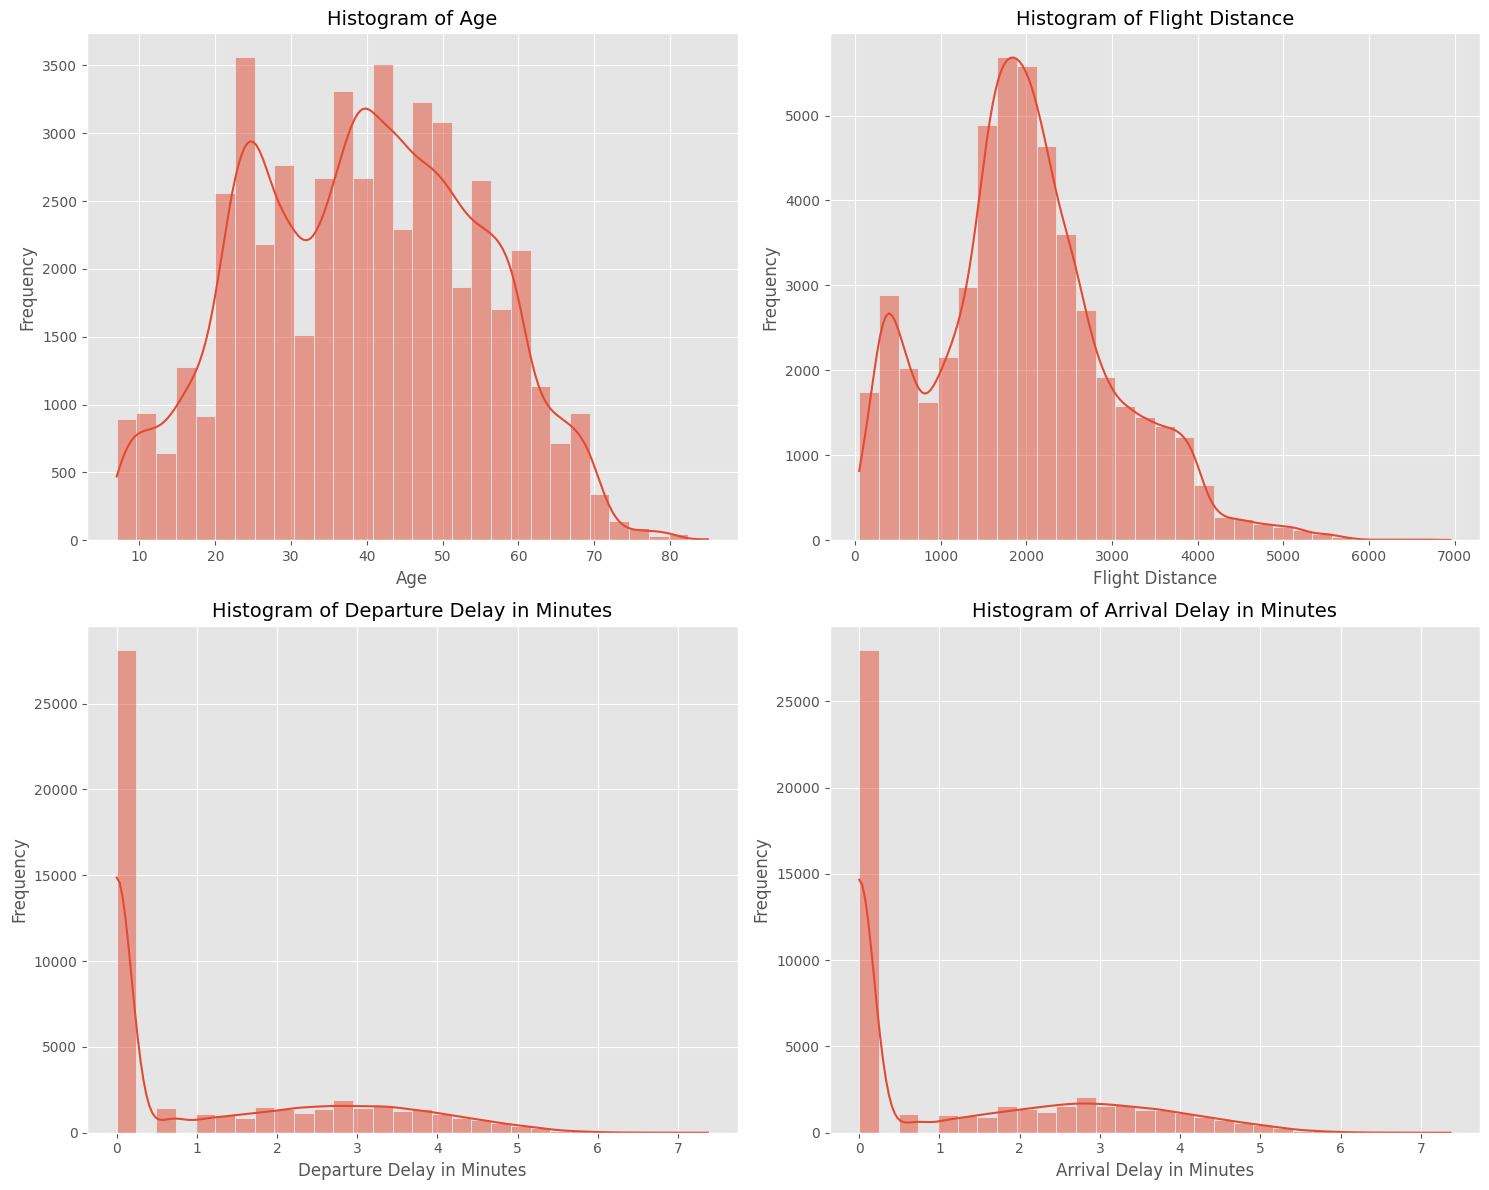

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.flatten()

for i, col in enumerate(cols_to_viz):
    sns.histplot(data=df, x=col, kde=True, ax=axes[i], bins=30)
    axes[i].set_title(f'Histogram of {col}', fontsize=14)
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel('Frequency', fontsize=12)

for j in range(len(cols_to_viz), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

### **Distrubution of categorical Data**

In [ ]:
cat_cols = df.select_dtypes(include = ['object']).columns

for col in cat_cols:
  print(f"For {col} column:\n")
  print(df[col].value_counts(normalize = True))
  print("\n")

For satisfaction column:

satisfaction
satisfied       0.547706
dissatisfied    0.452294
Name: proportion, dtype: float64


For Customer Type column:

Customer Type
Loyal Customer       0.816863
disloyal Customer    0.183137
Name: proportion, dtype: float64


For Type of Travel column:

Type of Travel
Business travel    0.691274
Personal Travel    0.308726
Name: proportion, dtype: float64


For Class column:

Class
Business    0.479062
Eco         0.449084
Eco Plus    0.071854
Name: proportion, dtype: float64




# **Feature Engineering**

### **Split the Predictors(X) and Dependent Variable(y)**

In [ ]:
X = df.drop('satisfaction', axis = 1)
y = df['satisfaction']

### **Label Enocde the Class Column as It's Values are Ordinal**

In [ ]:
X['Class'] = X['Class'].map({'Eco': 1, 'Eco Plus': 2, 'Business': 3})
X.Class.value_counts()

,count
Class,
3,23875
1,22381
2,3581


In [ ]:
X.shape

(49837, 21)

### **Split the Dataset into Training (70%) and Testing(30%)**

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=42)

In [ ]:
X_train.shape, X_test.shape

((34885, 21), (14952, 21))

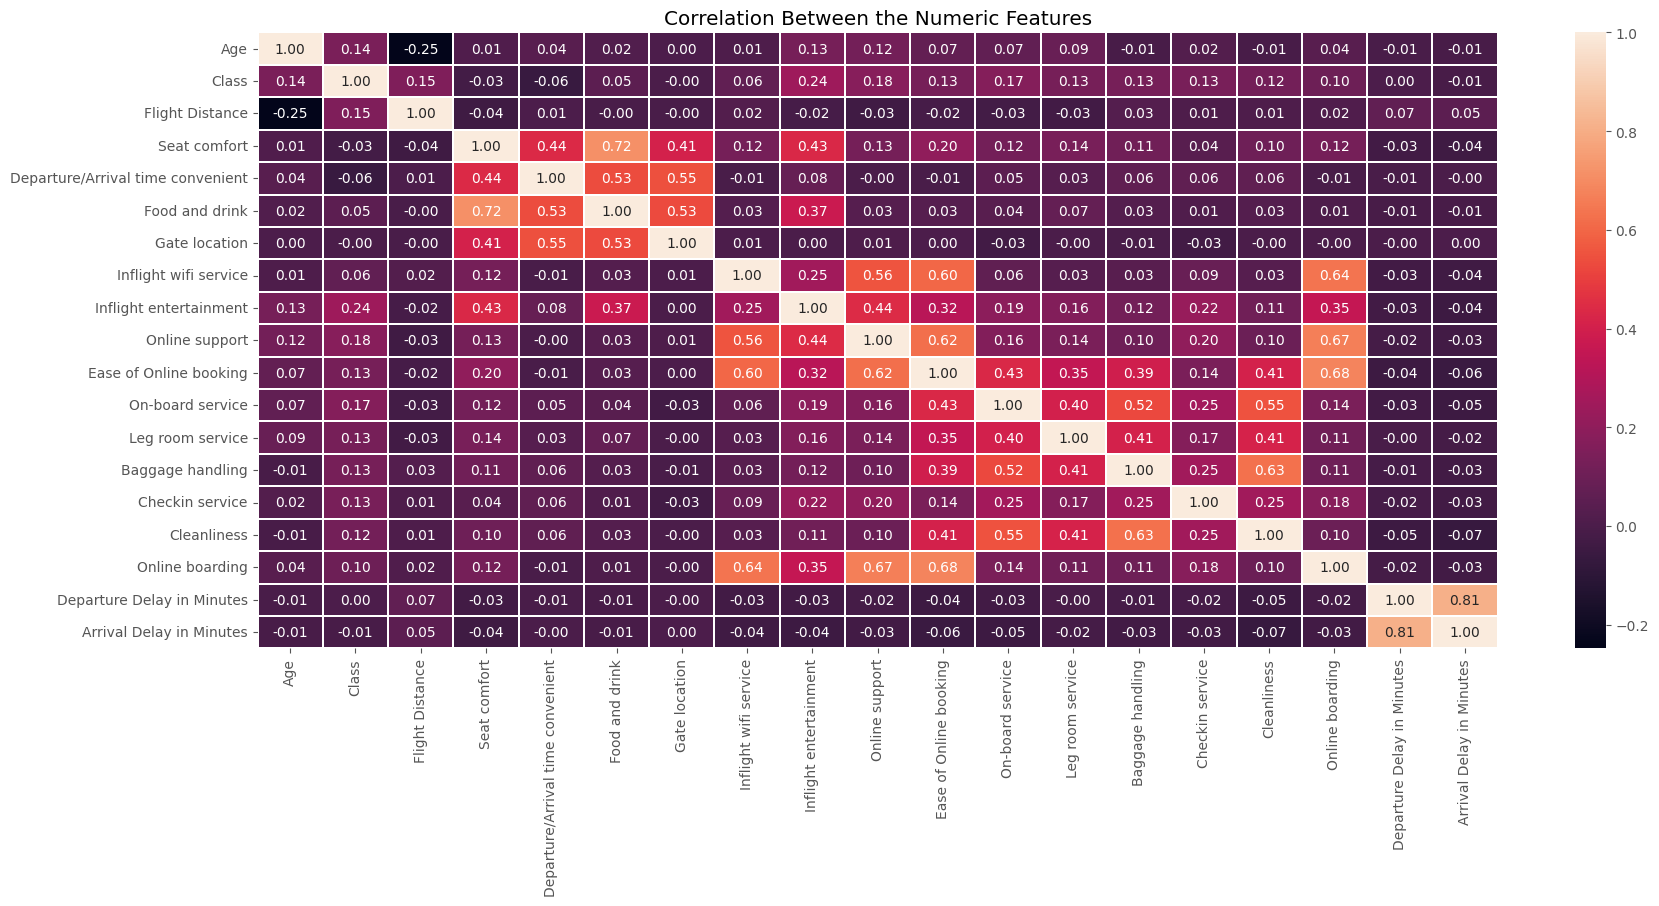

In [ ]:
numeric_data = X_train.select_dtypes(include = np.number)

plt.figure(figsize = (20, 8))
sns.heatmap(numeric_data.corr(), annot = True, fmt = '.2f', linewidths = 0.2)
plt.title('Correlation Between the Numeric Features')
plt.show()

### **Feature Selection**

**Feature Selection using Variance Inflation Factor (VIF)**

VIF is a metric used to detect multicollinearity in regression models. Multicollinearity occurs when independent variables are highly correlated, leading to unstable coefficients, difficulty in interpretation, and reduced model accuracy. VIF measures how much the variance of a coefficient is inflated due to correlations with other variables. A VIF greater than 5 typically indicates high multicollinearity. To address this, you can remove one of the correlated variables, create new features, or use regularization techniques.


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

### **Feature Scaling**

In [ ]:
cols_to_scale = X_train.select_dtypes(np.number).columns

X_train[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])
X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale])

These code snippets perform **feature scaling** on the numerical columns of a training and testing dataset.

* They first identify the numerical columns in the training data.
* Then, they use `MinMaxScaler` to scale the training data, ensuring all values fall within the range of 0 to 1.
* Finally, they apply the same scaling transformation to the testing data using the parameters learned from the training data.

This process is essential for improving the performance and stability of many machine learning models.

In [ ]:
X_train.head()

,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
11713,disloyal Customer,0.666667,Business travel,0.0,0.181990,0.6,0.2,0.6,0.6,0.8,0.6,0.8,0.8,0.25,0.8,0.75,0.2,0.75,0.8,0.000000,0.298198
49345,disloyal Customer,0.230769,Business travel,0.0,0.371399,0.6,0.4,0.4,0.6,1.0,0.4,1.0,1.0,0.25,1.0,0.50,0.4,0.50,1.0,0.465728,0.367525
48467,Loyal Customer,0.679487,Business travel,1.0,0.373436,0.2,0.2,0.2,0.2,0.8,1.0,1.0,1.0,1.00,1.0,1.00,0.8,1.00,1.0,0.000000,0.188142
23135,disloyal Customer,0.358974,Business travel,1.0,0.562991,0.4,0.4,0.4,0.8,0.4,0.4,0.6,1.0,0.50,0.8,1.00,0.6,1.00,0.6,0.500297,0.367525
25688,Loyal Customer,0.192308,Business travel,1.0,0.240035,0.8,1.0,0.2,0.2,0.8,0.8,0.8,0.8,0.50,0.8,0.50,0.2,0.75,0.8,0.419217,0.312497


In [ ]:
X_test.head()

,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
12106,disloyal Customer,0.076923,Business travel,0.0,0.254728,0.4,0.2,0.4,0.6,0.8,0.4,0.2,0.8,0.25,0.2,0.75,0.2,0.50,0.8,0.094007,0.000000
4671,Loyal Customer,0.205128,Business travel,1.0,0.382747,0.4,0.4,0.4,0.4,0.8,0.8,0.8,0.8,0.75,1.0,0.75,0.6,0.75,0.8,0.000000,0.000000
10576,Loyal Customer,0.538462,Personal Travel,0.0,0.262002,0.4,0.8,0.8,0.2,0.2,0.8,0.2,0.2,1.00,1.0,1.00,0.6,1.00,0.2,0.510106,0.447297
18821,disloyal Customer,0.346154,Business travel,1.0,0.454466,0.6,0.6,0.6,1.0,0.6,0.6,0.6,0.6,0.50,0.4,0.75,0.6,1.00,0.6,0.000000,0.000000
37437,Loyal Customer,0.564103,Business travel,1.0,0.430899,1.0,1.0,0.4,1.0,0.6,1.0,0.8,1.0,1.00,1.0,1.00,0.8,1.00,0.8,0.000000,0.000000


### **One Hot Encoding on the Nominal Features**

In [ ]:
X_train = pd.get_dummies(X_train, drop_first = True)
X_test = pd.get_dummies(X_test, drop_first = True)

X_train.head()

,Age,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,Customer Type_disloyal Customer,Type of Travel_Personal Travel
11713,0.666667,0.0,0.181990,0.6,0.2,0.6,0.6,0.8,0.6,0.8,0.8,0.25,0.8,0.75,0.2,0.75,0.8,0.000000,0.298198,True,False
49345,0.230769,0.0,0.371399,0.6,0.4,0.4,0.6,1.0,0.4,1.0,1.0,0.25,1.0,0.50,0.4,0.50,1.0,0.465728,0.367525,True,False
48467,0.679487,1.0,0.373436,0.2,0.2,0.2,0.2,0.8,1.0,1.0,1.0,1.00,1.0,1.00,0.8,1.00,1.0,0.000000,0.188142,False,False
23135,0.358974,1.0,0.562991,0.4,0.4,0.4,0.8,0.4,0.4,0.6,1.0,0.50,0.8,1.00,0.6,1.00,0.6,0.500297,0.367525,True,False
25688,0.192308,1.0,0.240035,0.8,1.0,0.2,0.2,0.8,0.8,0.8,0.8,0.50,0.8,0.50,0.2,0.75,0.8,0.419217,0.312497,False,False


In [ ]:
X_test.head()

,Age,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,Customer Type_disloyal Customer,Type of Travel_Personal Travel
12106,0.076923,0.0,0.254728,0.4,0.2,0.4,0.6,0.8,0.4,0.2,0.8,0.25,0.2,0.75,0.2,0.50,0.8,0.094007,0.000000,True,False
4671,0.205128,1.0,0.382747,0.4,0.4,0.4,0.4,0.8,0.8,0.8,0.8,0.75,1.0,0.75,0.6,0.75,0.8,0.000000,0.000000,False,False
10576,0.538462,0.0,0.262002,0.4,0.8,0.8,0.2,0.2,0.8,0.2,0.2,1.00,1.0,1.00,0.6,1.00,0.2,0.510106,0.447297,False,True
18821,0.346154,1.0,0.454466,0.6,0.6,0.6,1.0,0.6,0.6,0.6,0.6,0.50,0.4,0.75,0.6,1.00,0.6,0.000000,0.000000,True,False
37437,0.564103,1.0,0.430899,1.0,1.0,0.4,1.0,0.6,1.0,0.8,1.0,1.00,1.0,1.00,0.8,1.00,0.8,0.000000,0.000000,False,False


These lines of code perform **one-hot encoding** on the categorical variables in the training and testing data. The `drop_first=True` argument ensures that only k-1 dummy variables are created for a categorical feature with k categories, preventing multicollinearity.

In [ ]:
X_train.shape, X_test.shape

((34885, 21), (14952, 21))

# **Model Building**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

In [ ]:
class_mapping = {'satisfied': 1, 'dissatisfied': 0}
y_train = y_train.map(class_mapping)
y_test = y_test.map(class_mapping)

This code converts the target variable labels ('satisfied' and 'dissatisfied') into numerical labels (1 and 0) using a dictionary mapping, likely in preparation for a machine learning classification task.


### **Build the Baseline Models**

In [ ]:
def build_evaluate_model(model, model_name, train_x, train_y, test_x, test_y):
  """
  Builds, trains, evaluates, and visualizes the performance of a machine learning model.

  Args:
      model: An sklearn machine learning model object.
      model_name: A string representing the name of the model.
      train_x: A pandas DataFrame containing the training features.
      train_y: A pandas Series containing the training target labels.
      test_x: A pandas DataFrame containing the testing features.
      test_y: A pandas Series containing the testing target labels.

  Returns:
      The trained machine learning model object.

  Prints:
      The training score of the model on the training data.
      The accuracy score of the model on the testing data.
      The classification report for the model on the testing data.
      A confusion matrix visualization for the model's performance on the testing data.
      A ROC curve visualization for the model's performance on the testing data.
  """
  model_ = model.fit(train_x, train_y)
  print(f"Training Score for {model_name}: {model_.score(train_x, train_y)}\n")

  pred = model_.predict(test_x)

  labels = ['satisfied', 'dissatisfied']

  print(f"Accuracy Score for {model_name}: {accuracy_score(test_y, pred)}\n")

  print(f"Classification Report for {model_name}\n: {classification_report(test_y, pred, target_names=labels)}\n")

  sns.heatmap(confusion_matrix(test_y, pred), annot = True, fmt = 'd', cmap='Blues', cbar=False)
  plt.title(f"Confusion Matrix for {model_name}")
  plt.show()

  fpr, tpr, thresholds = roc_curve(test_y, model_.predict_proba(test_x)[:, 1])

  plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc_score(test_y, model_.predict_proba(test_x)[:, 1]):.4f})")
  plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('ROC Curve')
  plt.legend()
  plt.show()

  return model_

Training Score for Logistic Regression: 0.8281783001289953

Accuracy Score for Logistic Regression: 0.8292536115569823

Classification Report for Logistic Regression
:               precision    recall  f1-score   support

   satisfied       0.81      0.81      0.81      6739
dissatisfied       0.85      0.84      0.84      8213

    accuracy                           0.83     14952
   macro avg       0.83      0.83      0.83     14952
weighted avg       0.83      0.83      0.83     14952




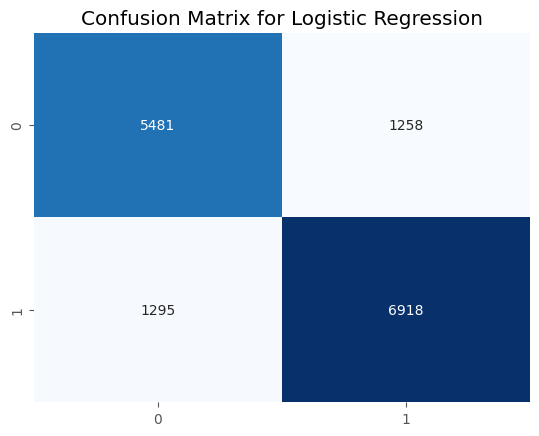

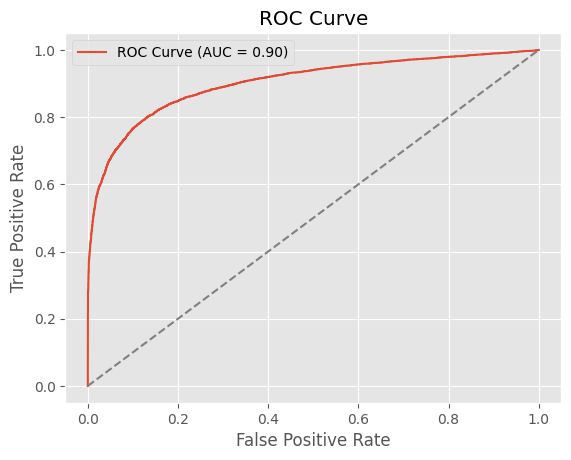

In [ ]:
lr_model = build_evaluate_model(model = LogisticRegression(random_state = 42), model_name = 'Logistic Regression', train_x = X_train, train_y = y_train,
                                test_x = X_test, test_y = y_test)

In [ ]:
feature_contributions = pd.DataFrame({
    'features': X_train.columns,
    'co-efficient': lr_model.coef_.ravel()
})

feature_contributions

,features,co-efficient
0,Age,-0.647476
1,Class,0.660684
2,Flight Distance,-1.227222
3,Seat comfort,1.313626
4,Departure/Arrival time convenient,-1.119294
5,Food and drink,-1.018802
6,Gate location,0.758473
7,Inflight wifi service,-0.454863
8,Inflight entertainment,3.585402
9,Online support,0.470906


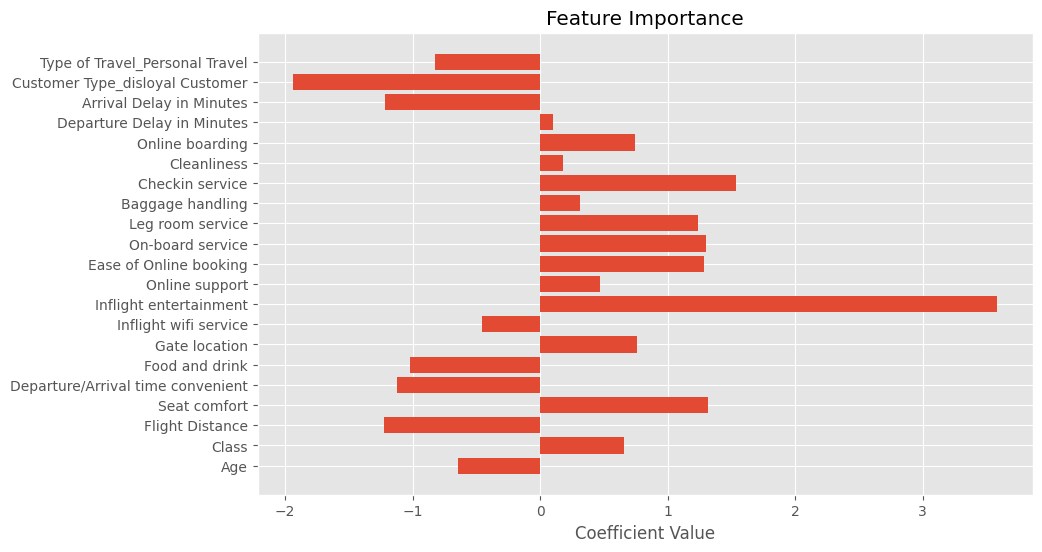

In [ ]:
plt.figure(figsize=(10, 6))
plt.barh(feature_contributions['features'], feature_contributions['co-efficient'])
plt.xlabel('Coefficient Value')
plt.title('Feature Importance')
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stopping = EarlyStopping(
  monitor='val_loss',   # Monitor validation loss
  patience=10,          # Number of epochs to wait for improvement
  restore_best_weights=True,  # Revert to the best weights after stopping
  verbose=1             # Print messages during early stopping
)

In [ ]:
class LogisticRegressionModel(tf.keras.Model):
  """
  A logistic regression model implemented using TensorFlow Keras.

  This model predicts the probability of an instance belonging to a specific class
  based on a linear combination of input features.

  Args:
    input_dim: The number of input features.
    regularizations: An optional regularization function (e.g., `tf.keras.regularizers.l2`)
                     to apply to the model's weights.

  Attributes:
    dense: A Dense layer with one output neuron and an activation function of 'sigmoid'.
           The `kernel_regularizer` argument is used to apply regularization to the
           weights of this layer.
  """

  def __init__(self, input_dim, regularizations = None):
    super(LogisticRegressionModel, self).__init__()
    self.dense = tf.keras.layers.Dense(1, activation = 'sigmoid', kernel_regularizer = regularizations)

  def call(self, inputs):
    return self.dense(inputs)

In [ ]:
def train_and_evaluate_model(input_dim, learning_rate, epochs, train_x, train_y, test_x, test_y, regularizations = None):
  """
  Trains and evaluates a logistic regression model using TensorFlow Keras.

  This function trains a logistic regression model to predict the probability of
  a binary classification task. It performs the following steps:

  1. Creates a LogisticRegressionModel instance with the specified input dimension
     and optional regularization.
  2. Compiles the model with Adam optimizer, binary crossentropy loss,
     and accuracy and AUC metrics.
  3. Trains the model on the training data with early stopping to prevent
     overfitting.
  4. Evaluates the model performance on the testing data using accuracy and AUC.

  Args:
    input_dim: The number of input features.
    learning_rate: The learning rate for the optimizer.
    epochs: The number of training epochs.
    train_x: The training data features (NumPy array).
    train_y: The training data labels (NumPy array, binary classification).
    test_x: The testing data features (NumPy array).
    test_y: The testing data labels (NumPy array, binary classification).
    regularizations: An optional regularization function (e.g., `tf.keras.regularizers.l2`)
                     to apply to the model's weights.

  Returns:
    The trained logistic regression model (LogisticRegressionModel instance).
  """
  model = LogisticRegressionModel(input_dim = input_dim, regularizations = regularizations)

  model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate = learning_rate),
    loss = 'binary_crossentropy',
    metrics = ['accuracy', tf.keras.metrics.AUC()]
  )

  # Train the model
  history = model.fit(train_x, train_y, epochs=epochs, validation_data=(test_x, test_y), callbacks=[early_stopping])
  # Plot training and validation loss
  plt.plot(history.history['loss'], label='Training Loss')
  plt.plot(history.history['val_loss'], label='Validation Loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.title('Training and Validation Loss')
  plt.legend()
  plt.show()

  return model

Epoch 1/300
1091/1091 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.5693 - auc: 0.5823 - loss: 0.7282 - val_accuracy: 0.6695 - val_auc: 0.8011 - val_loss: 0.5862
Epoch 2/300
1091/1091 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6991 - auc: 0.8204 - loss: 0.5649 - val_accuracy: 0.7627 - val_auc: 0.8561 - val_loss: 0.5113
Epoch 3/300
1091/1091 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7633 - auc: 0.8608 - loss: 0.5006 - val_accuracy: 0.7790 - val_auc: 0.8745 - val_loss: 0.4736
Epoch 4/300
1091/1091 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7889 - auc: 0.8786 - loss: 0.4646 - val_accuracy: 0.7939 - val_auc: 0.8816 - val_loss: 0.4528
Epoch 5/300
1091/1091 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7963 - auc: 0.8806 - loss: 0.4509 - val_accuracy: 0.7995 - val_auc: 0.8868 - val_loss: 0.4396
Epoch 6/300
1091/1091 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7983 - auc: 0.8834 - loss: 0.4425 - val_accuracy: 0.8064 - val_auc: 0.8901 - val_loss: 0.4310
Epoch 7/300
1091/1091 

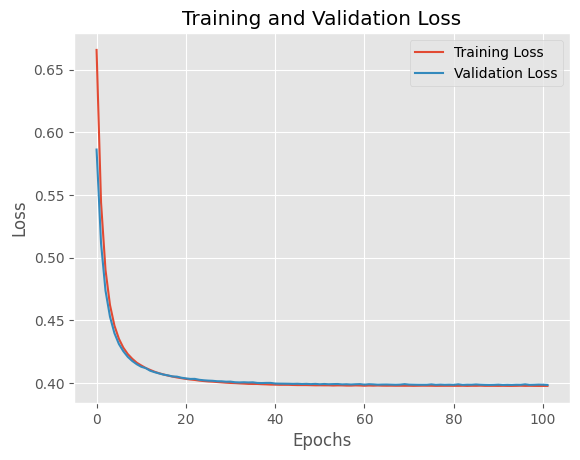

In [ ]:
model_base = train_and_evaluate_model(input_dim = X_train.shape[1], learning_rate = 0.001, epochs = 300,
                                      train_x = X_train, train_y = y_train, test_x = X_test, test_y = y_test)

Epoch 1/300
1091/1091 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5987 - auc_1: 0.6484 - loss: 0.6745 - val_accuracy: 0.7611 - val_auc_1: 0.8609 - val_loss: 0.5731
Epoch 2/300
1091/1091 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7657 - auc_1: 0.8660 - loss: 0.5628 - val_accuracy: 0.7869 - val_auc_1: 0.8779 - val_loss: 0.5432
Epoch 3/300
1091/1091 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7823 - auc_1: 0.8773 - loss: 0.5422 - val_accuracy: 0.7878 - val_auc_1: 0.8851 - val_loss: 0.5323
Epoch 4/300
1091/1091 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7925 - auc_1: 0.8829 - loss: 0.5330 - val_accuracy: 0.7937 - val_auc_1: 0.8894 - val_loss: 0.5260
Epoch 5/300
1091/1091 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7968 - auc_1: 0.8871 - loss: 0.5269 - val_accuracy: 0.7922 - val_auc_1: 0.8918 - val_loss: 0.5213
Epoch 6/300
1091/1091 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7997 - auc_1: 0.8898 - loss: 0.5207 - val_accuracy: 0.7967 - val_auc_1: 0.8935 - val_loss: 0.517

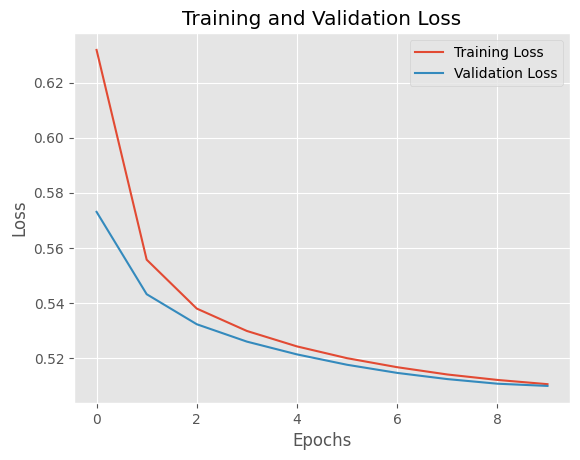

In [ ]:
model_reg = train_and_evaluate_model(input_dim = X_train.shape[1], learning_rate = 0.001, epochs = 300,
                                    train_x = X_train, train_y = y_train, test_x = X_test, test_y = y_test,
                                    regularizations = tf.keras.regularizers.l2(0.01))

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

def polynomial_transformation(train_x, test_x, interaction = False):
  poly = PolynomialFeatures(degree=2, interaction_only=interaction, include_bias=False)
  transformed_train = poly.fit_transform(train_x)
  transformed_test = poly.transform(test_x)
  return transformed_train, transformed_test, poly

In [ ]:
X_train_poly, X_test_poly, poly = polynomial_transformation(train_x = X_train, test_x = X_test)
X_train_poly.shape, X_test_poly.shape

((34885, 252), (14952, 252))

Training Score for Logistic Regression with Polynimial Transformation: 0.9109645979647413

Accuracy Score for Logistic Regression with Polynimial Transformation: 0.907972177635099

Classification Report for Logistic Regression with Polynimial Transformation
:               precision    recall  f1-score   support

   satisfied       0.89      0.91      0.90      6739
dissatisfied       0.92      0.91      0.92      8213

    accuracy                           0.91     14952
   macro avg       0.91      0.91      0.91     14952
weighted avg       0.91      0.91      0.91     14952




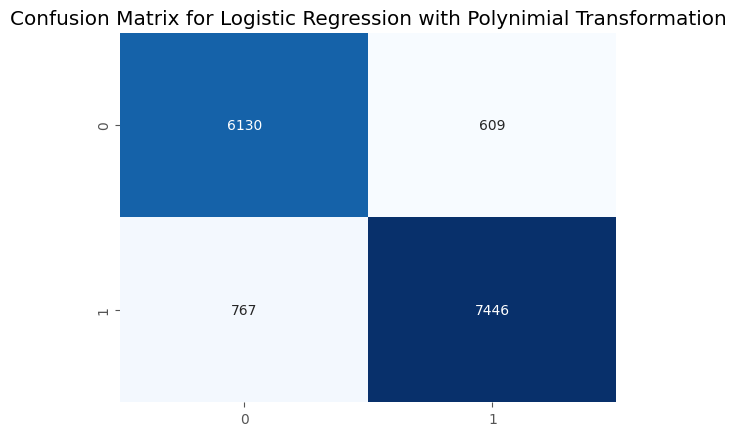

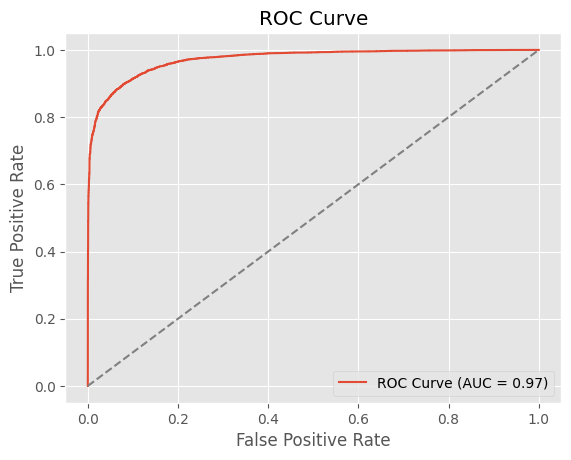

In [ ]:
lr_model_poly = build_evaluate_model(model = LogisticRegression(random_state = 42), model_name = 'Logistic Regression with Polynimial Transformation',
                                     train_x = X_train_poly, train_y = y_train, test_x = X_test_poly, test_y = y_test)

Epoch 1/300
1091/1091 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7583 - auc_2: 0.8594 - loss: 0.4873 - val_accuracy: 0.8329 - val_auc_2: 0.9075 - val_loss: 0.3883
Epoch 2/300
1091/1091 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8356 - auc_2: 0.9094 - loss: 0.3824 - val_accuracy: 0.8466 - val_auc_2: 0.9181 - val_loss: 0.3644
Epoch 3/300
1091/1091 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8451 - auc_2: 0.9187 - loss: 0.3613 - val_accuracy: 0.8558 - val_auc_2: 0.9251 - val_loss: 0.3491
Epoch 4/300
1091/1091 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8517 - auc_2: 0.9239 - loss: 0.3507 - val_accuracy: 0.8614 - val_auc_2: 0.9305 - val_loss: 0.3442
Epoch 5/300
1091/1091 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8601 - auc_2: 0.9304 - loss: 0.3366 - val_accuracy: 0.8644 - val_auc_2: 0.9348 - val_loss: 0.3276
Epoch 6/300
1091/1091 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8688 - auc_2: 0.9375 - loss: 0.3217 - val_accuracy: 0.8699 - val_auc_2: 0.9384 - val_loss: 0.319

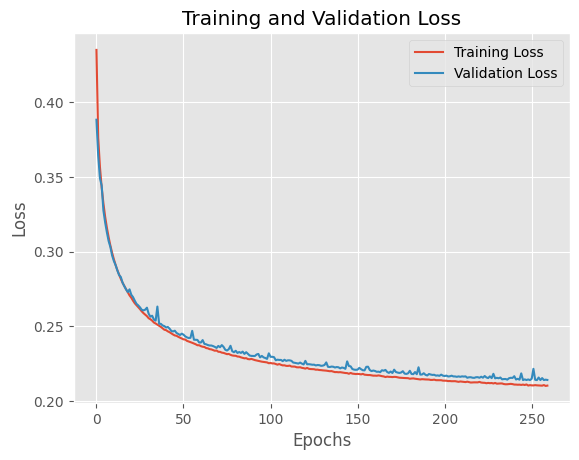

In [ ]:
model_poly = train_and_evaluate_model(input_dim = X_train_poly.shape[1], learning_rate = 0.001, epochs = 300,
                                      train_x = X_train_poly, train_y = y_train, test_x = X_test_poly, test_y = y_test)

In [ ]:
X_train_poly_reg, X_test_poly_reg, poly_reg = polynomial_transformation(train_x = X_train, test_x = X_test)

Epoch 1/300
1091/1091 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7631 - auc_3: 0.8705 - loss: 0.5134 - val_accuracy: 0.8327 - val_auc_3: 0.9087 - val_loss: 0.4311
Epoch 2/300
1091/1091 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8304 - auc_3: 0.9078 - loss: 0.4307 - val_accuracy: 0.8382 - val_auc_3: 0.9155 - val_loss: 0.4192
Epoch 3/300
1091/1091 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8399 - auc_3: 0.9154 - loss: 0.4175 - val_accuracy: 0.8424 - val_auc_3: 0.9176 - val_loss: 0.4154
Epoch 4/300
1091/1091 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8445 - auc_3: 0.9187 - loss: 0.4106 - val_accuracy: 0.8475 - val_auc_3: 0.9181 - val_loss: 0.4141
Epoch 5/300
1091/1091 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8410 - auc_3: 0.9164 - loss: 0.4139 - val_accuracy: 0.8436 - val_auc_3: 0.9191 - val_loss: 0.4099
Epoch 6/300
1091/1091 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8399 - auc_3: 0.9142 - loss: 0.4154 - val_accuracy: 0.8434 - val_auc_3: 0.9186 - val_loss: 0.408

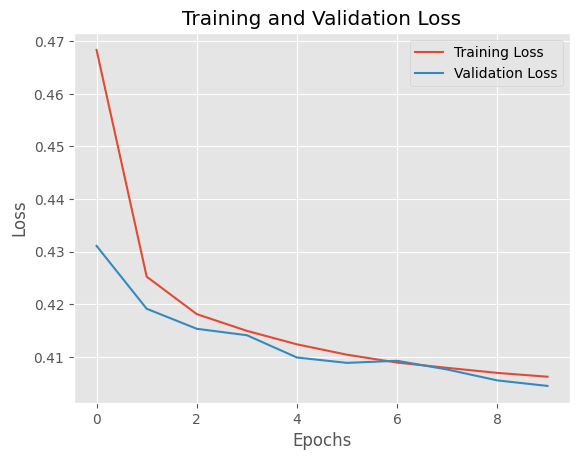

In [ ]:
model_poly_reg = train_and_evaluate_model(input_dim = X_train_poly_reg.shape[1], learning_rate = 0.001, epochs = 300,
                                          train_x = X_train_poly_reg, train_y = y_train, test_x = X_test_poly_reg, test_y = y_test,
                                          regularizations = tf.keras.regularizers.l2(0.01))

In [ ]:
X_train_poly_inter, X_test_poly_inter, poly_inter = polynomial_transformation(train_x = X_train, test_x = X_test, interaction = True)
X_train_poly_inter.shape, X_test_poly_inter.shape

((34885, 231), (14952, 231))

Training Score for Logistic Regressionwith Polynimial Transformation and Interactions: 0.9015622760498782

Accuracy Score for Logistic Regressionwith Polynimial Transformation and Interactions: 0.8990770465489567

Classification Report for Logistic Regressionwith Polynimial Transformation and Interactions
:               precision    recall  f1-score   support

   satisfied       0.88      0.90      0.89      6739
dissatisfied       0.92      0.90      0.91      8213

    accuracy                           0.90     14952
   macro avg       0.90      0.90      0.90     14952
weighted avg       0.90      0.90      0.90     14952




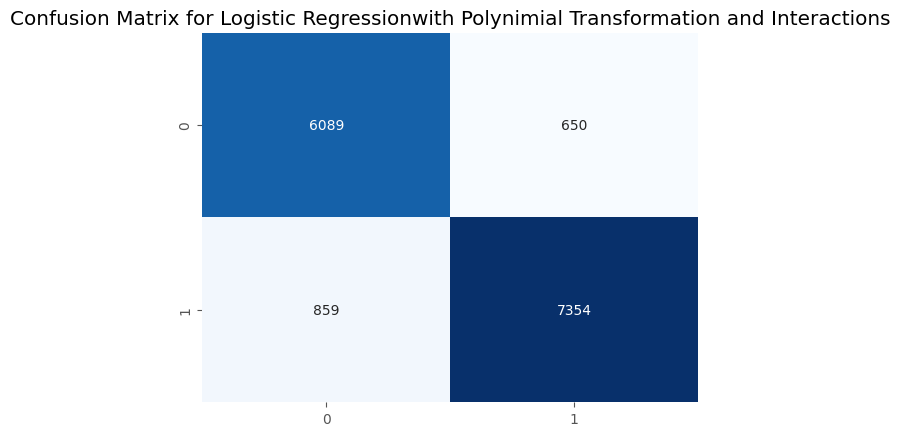

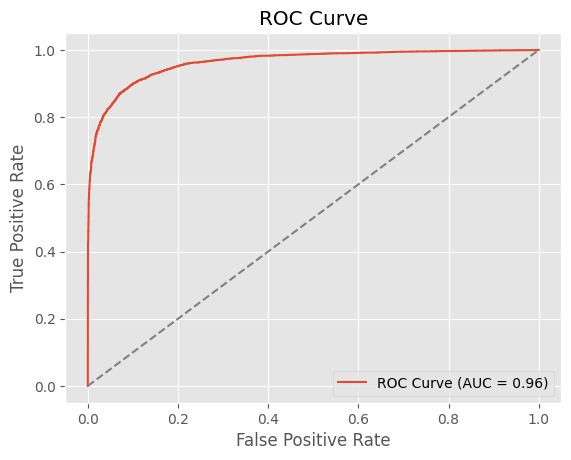

In [ ]:
lr_model_poly_inter = build_evaluate_model(model = LogisticRegression(random_state = 42), model_name = 'Logistic Regressionwith Polynimial Transformation and Interactions',
                                           train_x = X_train_poly_inter, train_y = y_train, test_x = X_test_poly_inter, test_y = y_test)

Epoch 1/300
1091/1091 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7354 - auc_4: 0.8500 - loss: 0.5037 - val_accuracy: 0.8279 - val_auc_4: 0.9032 - val_loss: 0.3964
Epoch 2/300
1091/1091 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8239 - auc_4: 0.9014 - loss: 0.3972 - val_accuracy: 0.8359 - val_auc_4: 0.9129 - val_loss: 0.3763
Epoch 3/300
1091/1091 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8426 - auc_4: 0.9158 - loss: 0.3678 - val_accuracy: 0.8490 - val_auc_4: 0.9182 - val_loss: 0.3646
Epoch 4/300
1091/1091 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8453 - auc_4: 0.9182 - loss: 0.3626 - val_accuracy: 0.8481 - val_auc_4: 0.9224 - val_loss: 0.3549
Epoch 5/300
1091/1091 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8486 - auc_4: 0.9212 - loss: 0.3559 - val_accuracy: 0.8579 - val_auc_4: 0.9259 - val_loss: 0.3538
Epoch 6/300
1091/1091 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8525 - auc_4: 0.9240 - loss: 0.3495 - val_accuracy: 0.8589 - val_auc_4: 0.9279 - val_loss: 0.342

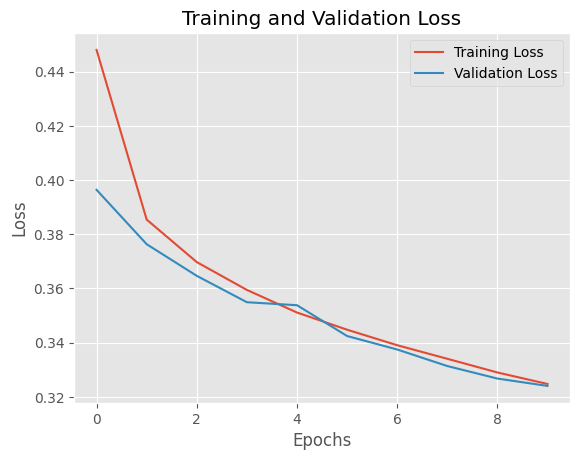

In [ ]:
model_poly_inter = train_and_evaluate_model(input_dim = X_train_poly_inter.shape[1], learning_rate = 0.001, epochs = 300,
                                            train_x = X_train_poly_inter, train_y = y_train, test_x = X_test_poly_inter, test_y = y_test)

In [ ]:
X_train_poly_inter_reg, X_test_poly_inter_reg, poly_inter_reg = polynomial_transformation(train_x = X_train, test_x = X_test, interaction = True)

Epoch 1/300
1091/1091 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7141 - auc_5: 0.8184 - loss: 0.5508 - val_accuracy: 0.8231 - val_auc_5: 0.9009 - val_loss: 0.4445
Epoch 2/300
1091/1091 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8259 - auc_5: 0.9046 - loss: 0.4365 - val_accuracy: 0.8314 - val_auc_5: 0.9089 - val_loss: 0.4303
Epoch 3/300
1091/1091 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8294 - auc_5: 0.9074 - loss: 0.4306 - val_accuracy: 0.8379 - val_auc_5: 0.9113 - val_loss: 0.4256
Epoch 4/300
1091/1091 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8340 - auc_5: 0.9079 - loss: 0.4285 - val_accuracy: 0.8404 - val_auc_5: 0.9121 - val_loss: 0.4234
Epoch 5/300
1091/1091 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8328 - auc_5: 0.9081 - loss: 0.4268 - val_accuracy: 0.8378 - val_auc_5: 0.9125 - val_loss: 0.4205
Epoch 6/300
1091/1091 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8393 - auc_5: 0.9114 - loss: 0.4198 - val_accuracy: 0.8381 - val_auc_5: 0.9123 - val_loss: 0.419

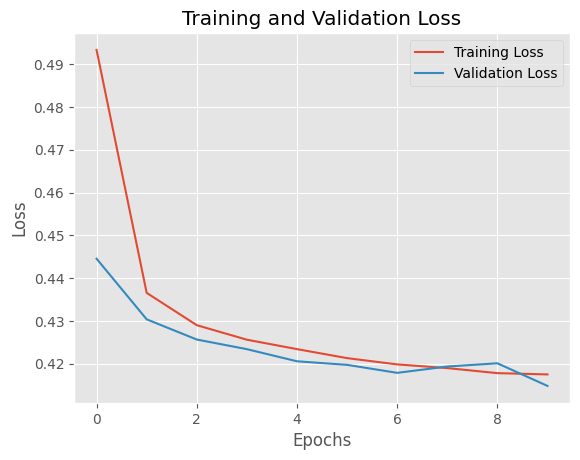

In [ ]:
model_poly_inter_reg = train_and_evaluate_model(input_dim = X_train_poly_inter_reg.shape[1], learning_rate = 0.001, epochs = 300,
                                                train_x = X_train_poly_inter_reg, train_y = y_train, test_x = X_test_poly_inter_reg, test_y = y_test,
                                                regularizations = tf.keras.regularizers.l2(0.01))

In [ ]:
pred_poly = model_poly.predict(X_test_poly)

468/468 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


Accuracy Score: 0.9075708935259497

Classification Report
:               precision    recall  f1-score   support

   satisfied       0.89      0.91      0.90      6739
dissatisfied       0.93      0.90      0.91      8213

    accuracy                           0.91     14952
   macro avg       0.91      0.91      0.91     14952
weighted avg       0.91      0.91      0.91     14952




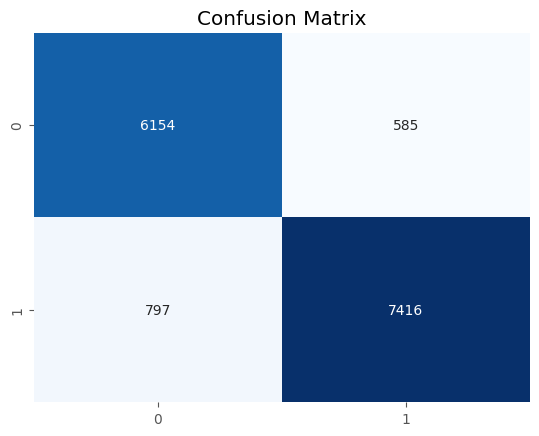

In [ ]:
pred_binary = (pred_poly >= 0.5).astype(int)

labels = ['satisfied', 'dissatisfied']

print(f"Accuracy Score: {accuracy_score(y_test, pred_binary)}\n")

print(f"Classification Report\n: {classification_report(y_test, pred_binary, target_names=labels)}\n")

sns.heatmap(confusion_matrix(y_test, pred_binary), annot = True, fmt = 'd', cmap='Blues', cbar=False)
plt.title(f"Confusion Matrix")
plt.show()

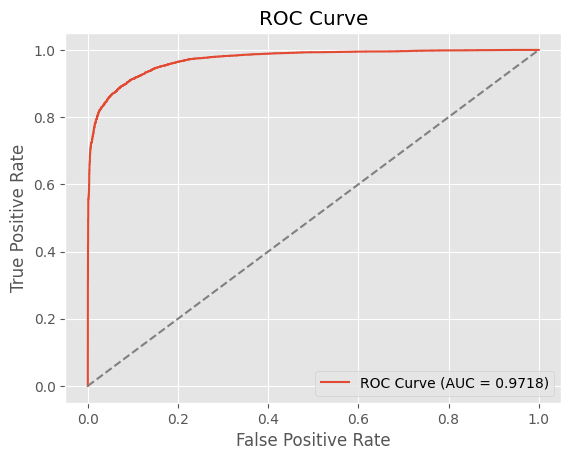

In [ ]:
# Get probabilities from the model
y_pred_probs = model_poly(X_test_poly, training=False).numpy().flatten()  # Get probabilities

# Calculate the ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
auc_score = roc_auc_score(y_test, y_pred_probs)

# Plot the ROC Curve
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc_score:.4f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [ ]:
poly_feature_names = poly.get_feature_names_out(X_train.columns)
print(poly_feature_names)

['Age' 'Class' 'Flight Distance' 'Seat comfort'
 'Departure/Arrival time convenient' 'Food and drink' 'Gate location'
 'Inflight wifi service' 'Inflight entertainment' 'Online support'
 'Ease of Online booking' 'On-board service' 'Leg room service'
 'Baggage handling' 'Checkin service' 'Cleanliness' 'Online boarding'
 'Departure Delay in Minutes' 'Arrival Delay in Minutes'
 'Customer Type_disloyal Customer' 'Type of Travel_Personal Travel'
 'Age^2' 'Age Class' 'Age Flight Distance' 'Age Seat comfort'
 'Age Departure/Arrival time convenient' 'Age Food and drink'
 'Age Gate location' 'Age Inflight wifi service'
 'Age Inflight entertainment' 'Age Online support'
 'Age Ease of Online booking' 'Age On-board service'
 'Age Leg room service' 'Age Baggage handling' 'Age Checkin service'
 'Age Cleanliness' 'Age Online boarding' 'Age Departure Delay in Minutes'
 'Age Arrival Delay in Minutes' 'Age Customer Type_disloyal Customer'
 'Age Type of Travel_Personal Travel' 'Class^2' 'Class Flight Dist

Intercept (Bias): -1.0931


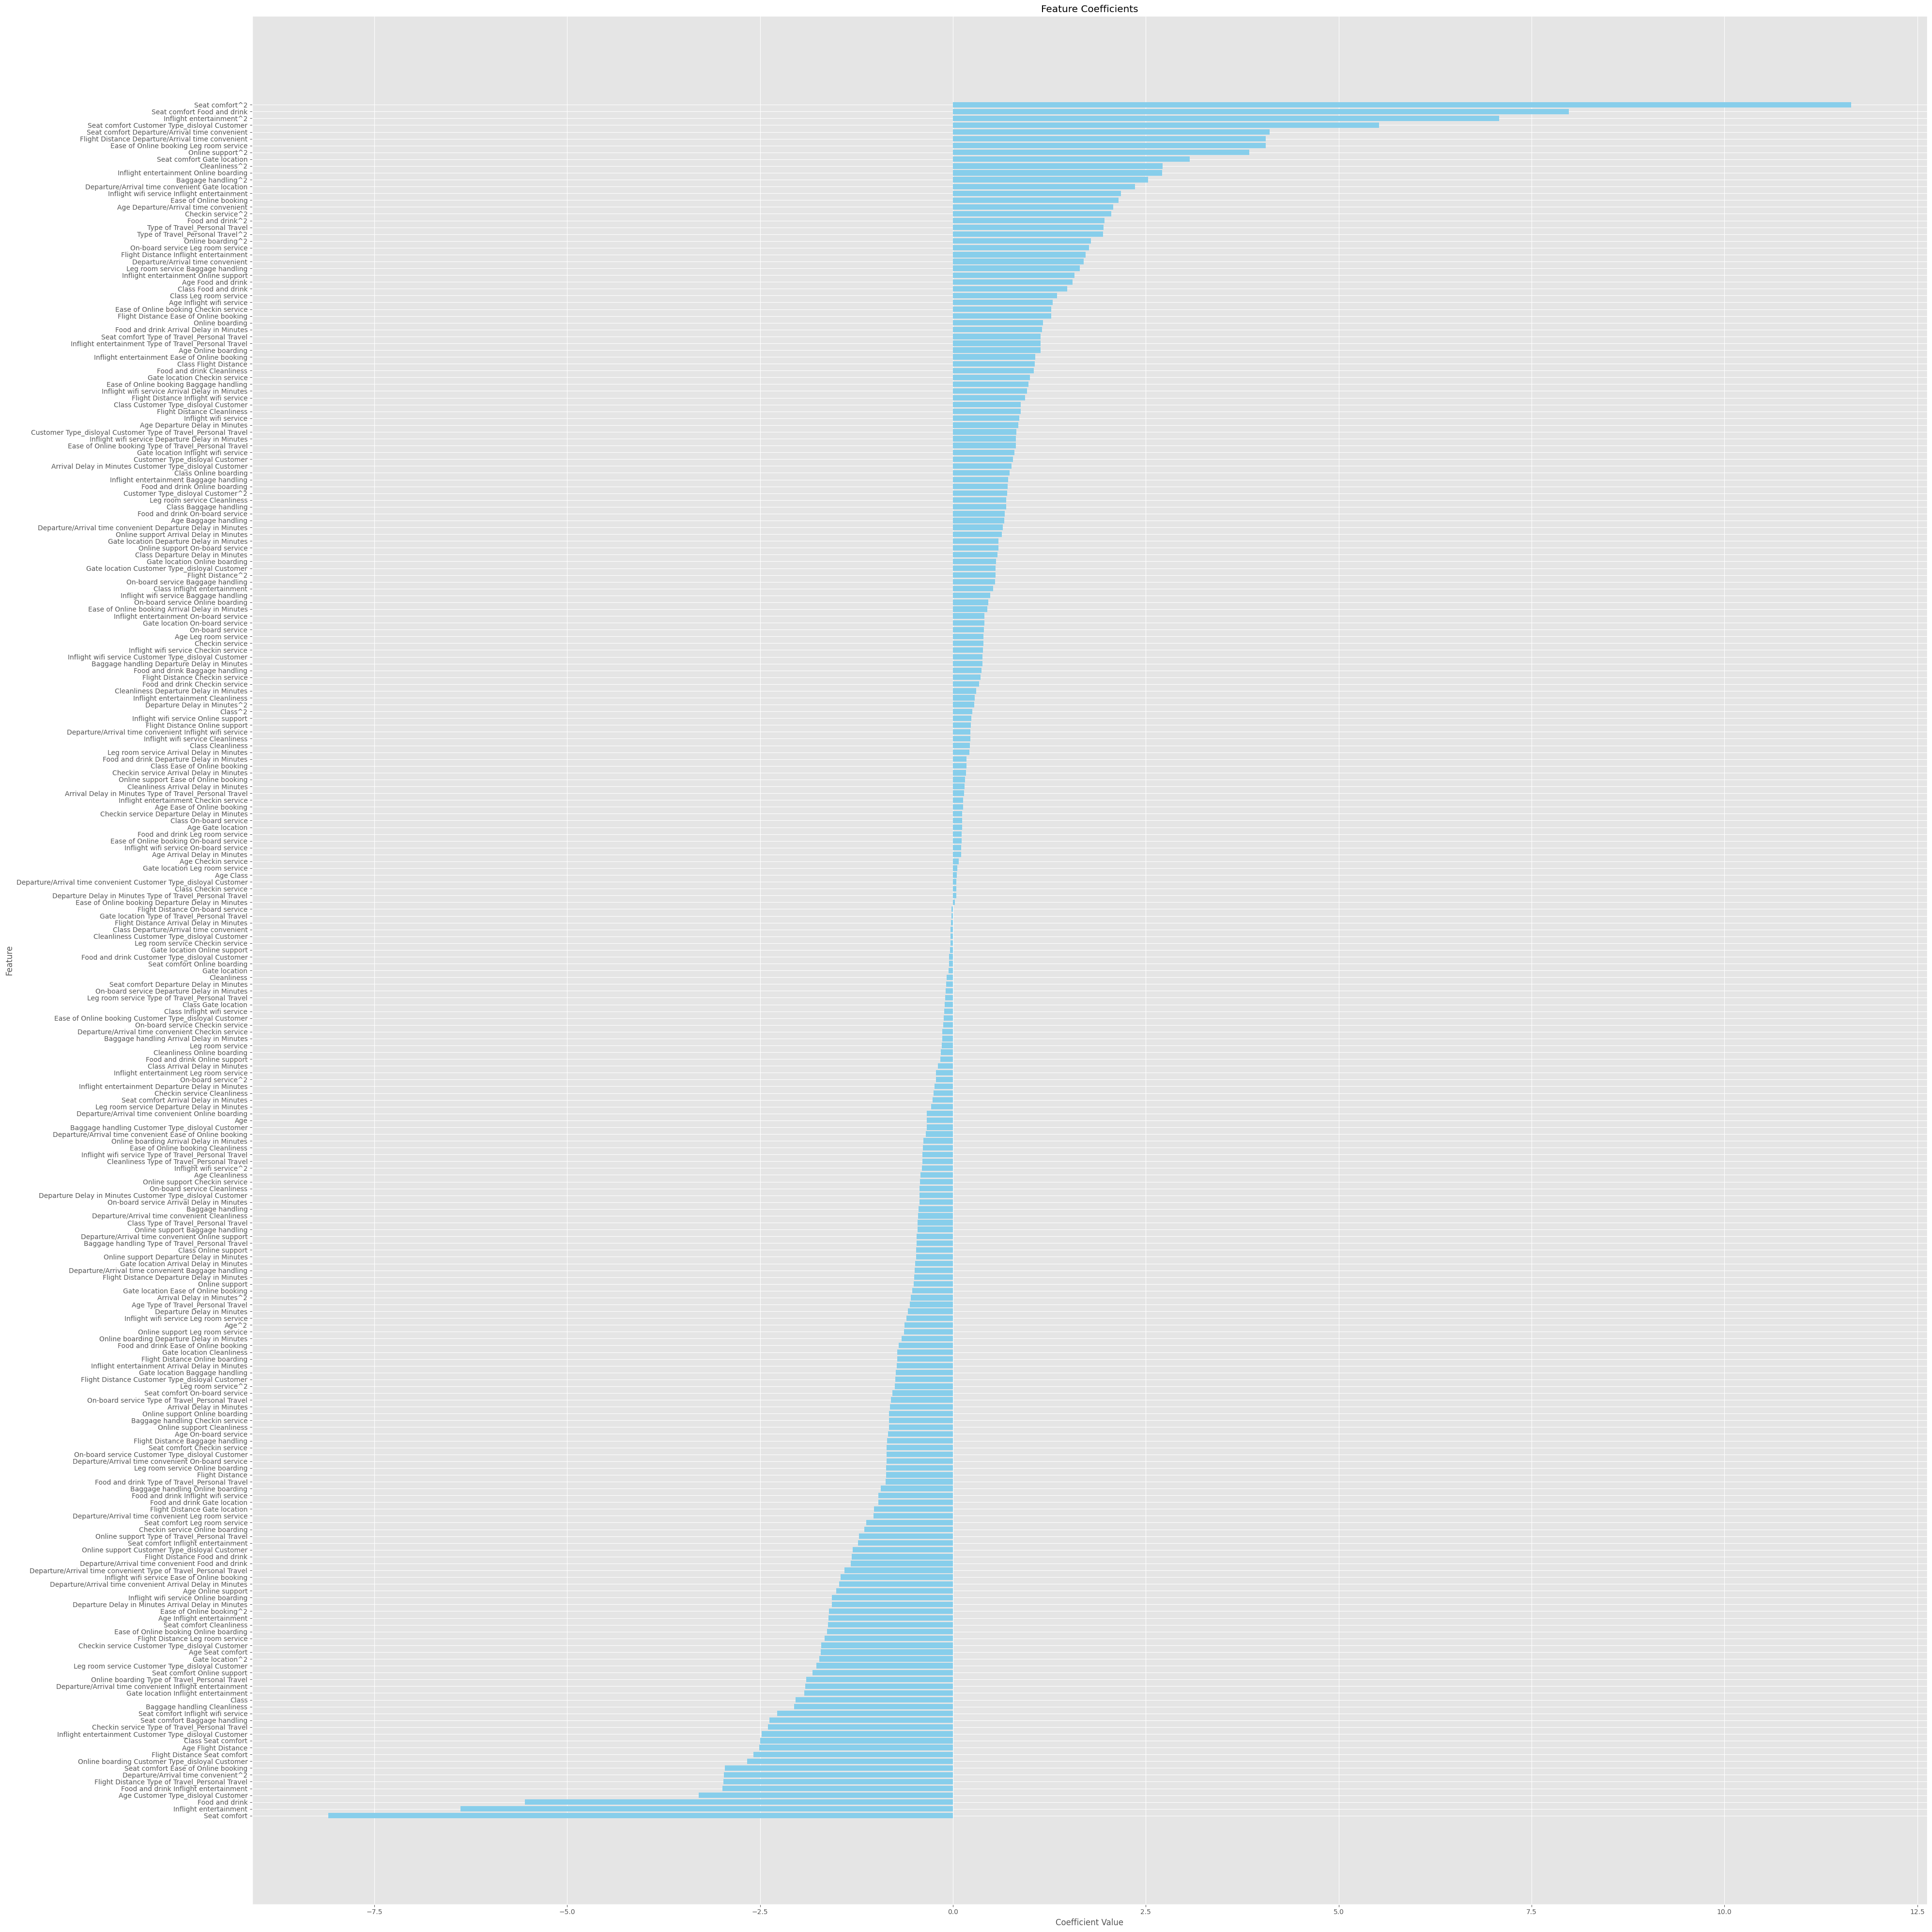

In [ ]:
# Get the weights and bias
weights, bias = model_poly.layers[0].get_weights()

# Print the intercept (bias)
print(f"Intercept (Bias): {bias[0]:.4f}")

# Flatten weights for easier processing
coefficients = weights.flatten()

# Create a dictionary of features and coefficients
coef_dict = {feature: coef for feature, coef in zip(poly_feature_names, coefficients)}

# Sort the coefficients for better visualization
sorted_coef = dict(sorted(coef_dict.items(), key=lambda item: item[1]))

In [ ]:
# Extract top 10, middle 10, and bottom 10 features
sorted_items = list(sorted_coef.items())
top_10 = sorted_items[-10:]  # Top 10 features
middle_10_start = len(sorted_items) // 2 - 5
middle_10 = sorted_items[middle_10_start:middle_10_start + 10]  # Middle 10 features
bottom_10 = sorted_items[:10]  # Bottom 10 features

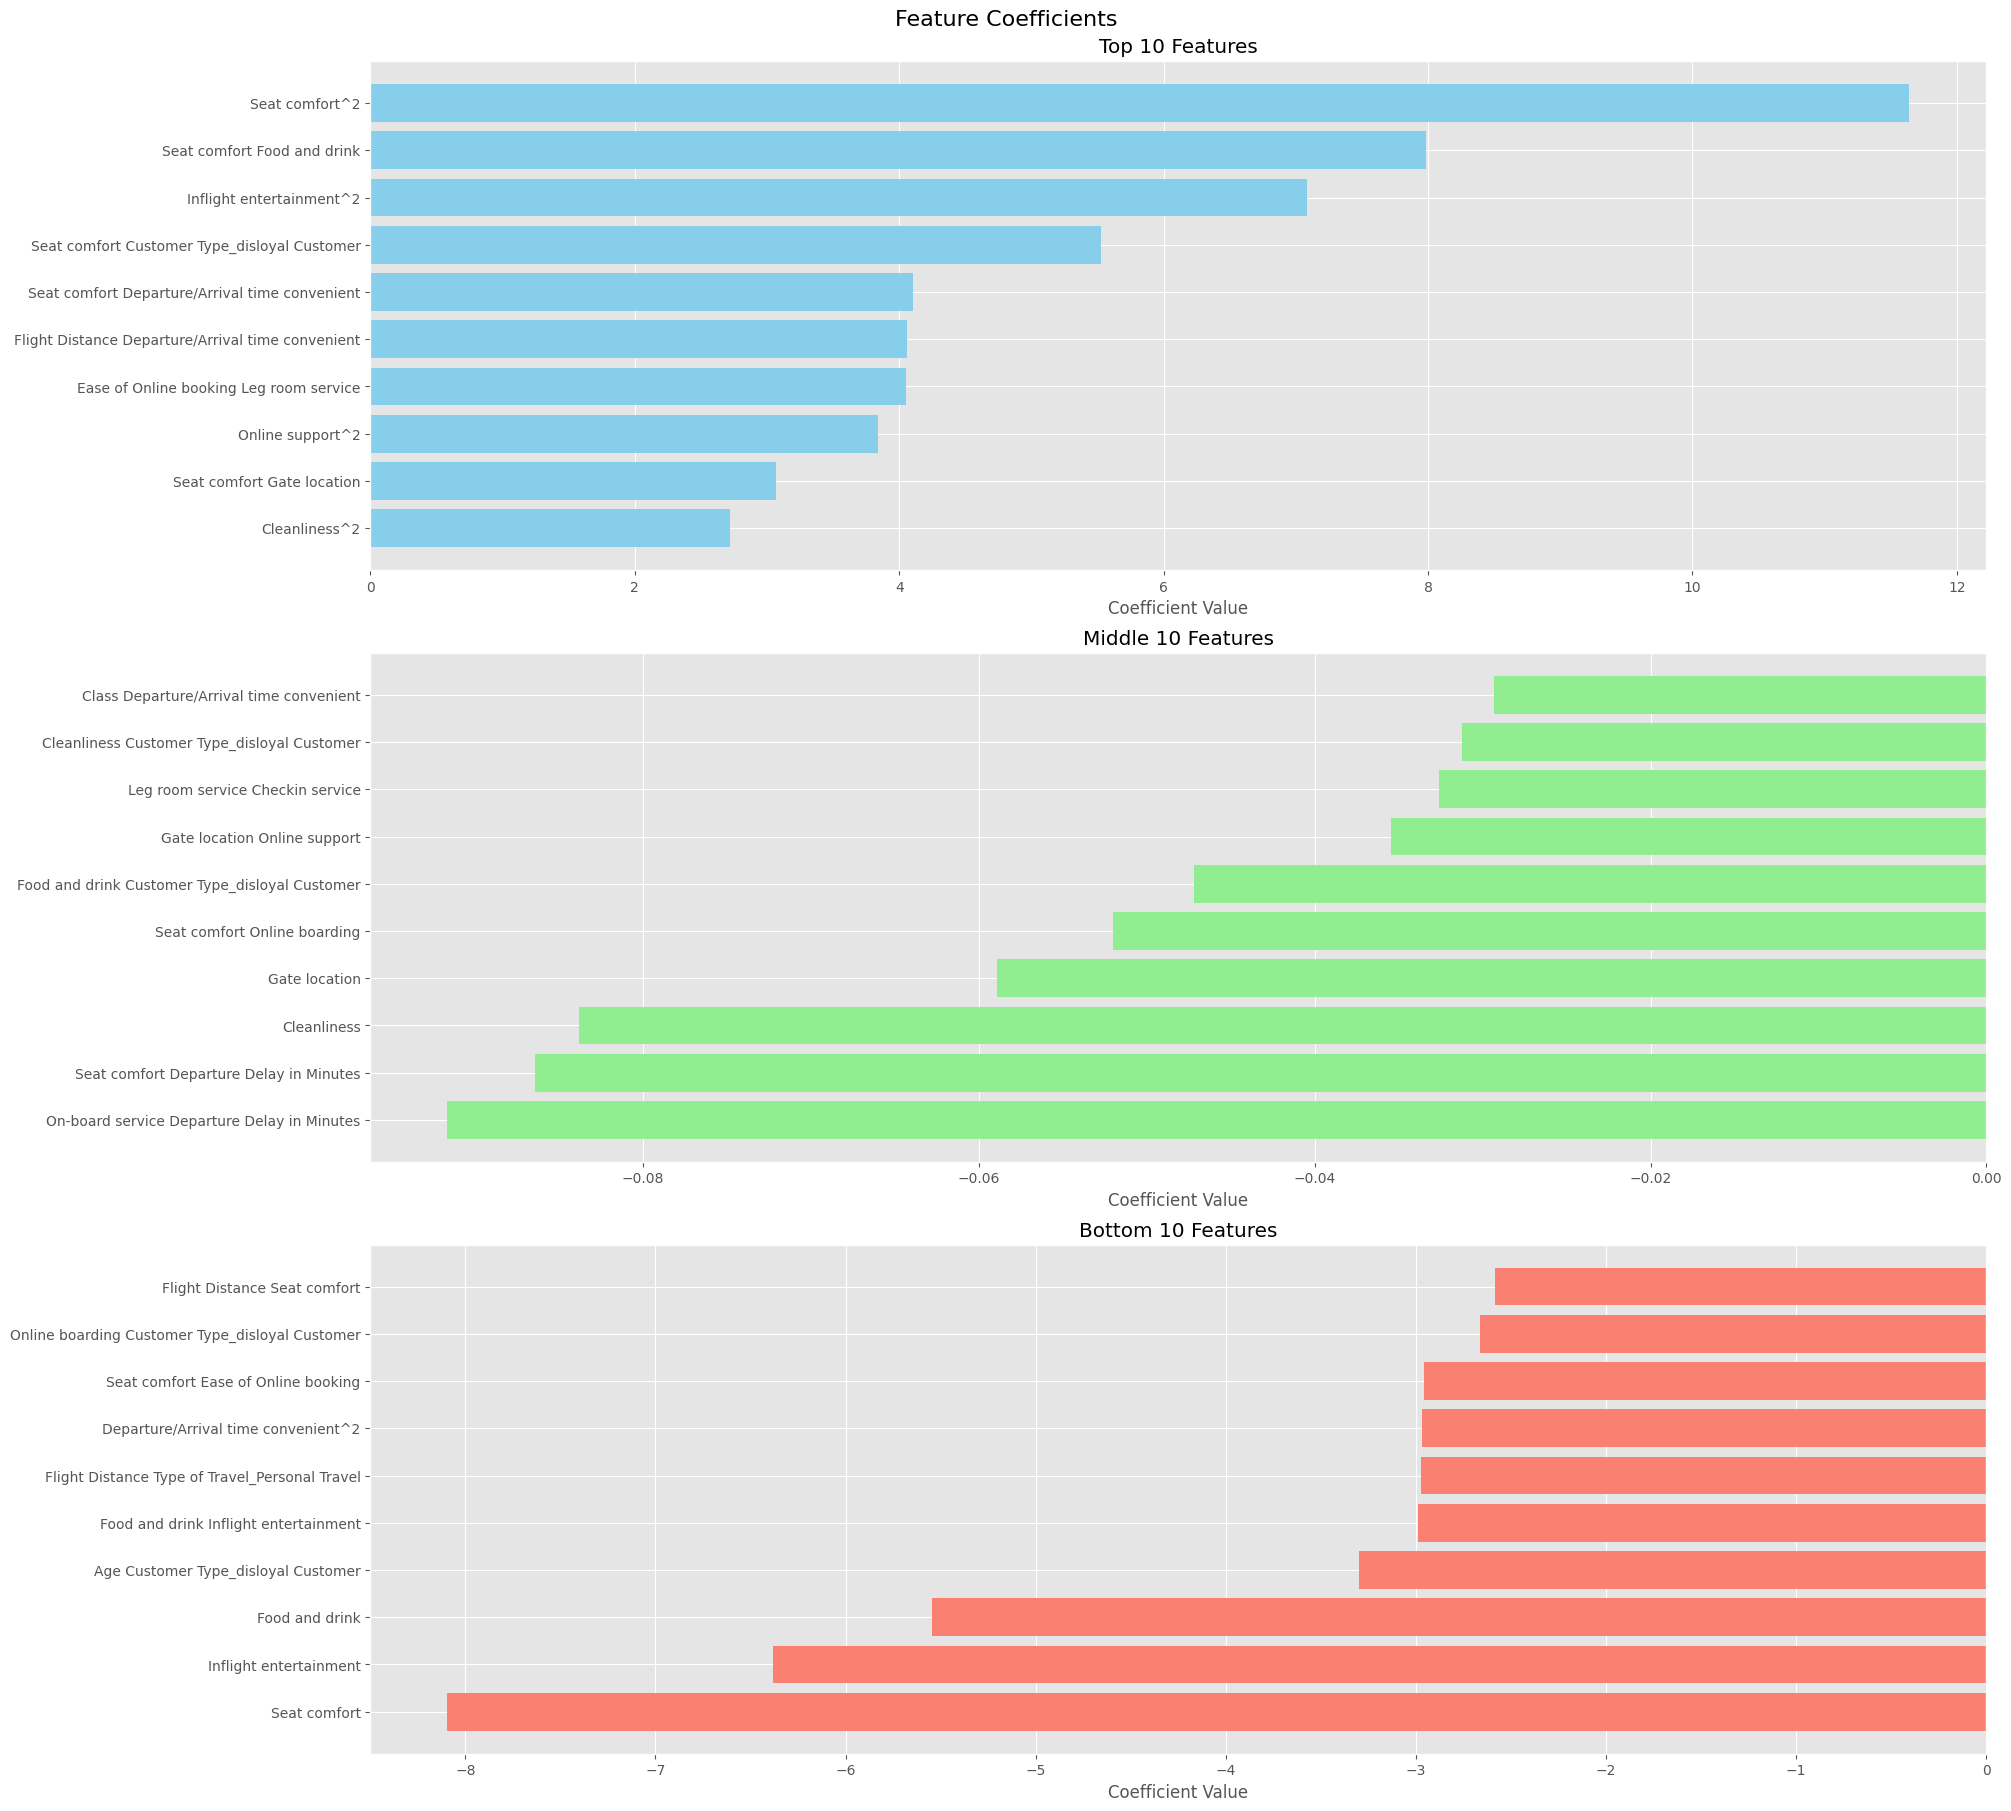

In [ ]:
# Create 3x1 subplots
fig, axes = plt.subplots(3, 1, figsize=(20, 18), constrained_layout=True)

# Plot top 10 features
axes[0].barh([item[0] for item in top_10], [item[1] for item in top_10], color='skyblue')
axes[0].set_title('Top 10 Features')
axes[0].set_xlabel('Coefficient Value')
axes[0].axvline(x=0, color='gray', linestyle='--', linewidth=0.8)

# Plot middle 10 features
axes[1].barh([item[0] for item in middle_10], [item[1] for item in middle_10], color='lightgreen')
axes[1].set_title('Middle 10 Features')
axes[1].set_xlabel('Coefficient Value')
axes[1].axvline(x=0, color='gray', linestyle='--', linewidth=0.8)

# Plot bottom 10 features
axes[2].barh([item[0] for item in bottom_10], [item[1] for item in bottom_10], color='salmon')
axes[2].set_title('Bottom 10 Features')
axes[2].set_xlabel('Coefficient Value')
axes[2].axvline(x=0, color='gray', linestyle='--', linewidth=0.8)

# Show the plots
plt.suptitle('Feature Coefficients', fontsize=16)
plt.show()